In [1]:
import numpy as np
import astropy
from astropy.io import ascii
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import Table
from astropy.table import Table, Column
import pylab
from pylab import plot
from astropy.cosmology import WMAP9 as cosmo
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='svg'
%config InlineBackend.figure_format='retina'

In [2]:
print("\033[43;30mLendo os catalogos\033[m")
w = ascii.read('wen.csv') 
r = fits.open('redmapper.fits') 
k = Table.read('koester2007.vot', format='votable')
r = r[1].data
print 'Wen:',len(w)
print 'Rykoff:',len(r)
print 'Koester:', len(k) 

Lendo os catalogos


Wen: 132684
Rykoff: 26111
Koester: 13823


In [3]:
print("\033[43;30mValores de Ra, Dec e z de cada catalogo\033[m")
c_w = SkyCoord(ra = w['RAJ2000']*u.deg, dec = w['DEJ2000']*u.deg, distance = cosmo.comoving_distance(w['zph'])) 
c_r = SkyCoord(ra = r['RA']*u.deg, dec = r['DEC']*u.deg, distance = cosmo.comoving_distance(r['Z_LAMBDA']))
c_k = SkyCoord(ra = k['RAJ2000'], dec = k['DEJ2000'], distance = cosmo.comoving_distance(k['zph'])) 

Valores de Ra, Dec e z de cada catalogo


# Match do Wen com o Rykoff

In [4]:
print 'match to catalog 3d'
idwx, d2dw, d3d = c_w.match_to_catalog_3d(c_r) 
print 'Match Wen em relacao ao Redmapper =',len(idwx)
print idwx, d2dw, d3d 

print 'match to catalog 3d'
idrx, d2dr, d3d = c_r.match_to_catalog_3d(c_w) 
print 'Match Wen em relacao ao Redmapper =',len(idrx)
print idrx, d2dr, d3d

match to catalog 3d
Match Wen em relacao ao Redmapper = 132684
[ 1803  9032 18830 ...,  2468 26004  8176] [u'4d43m43.8962s' u'0d00m00.0182s' u'1d59m21.6947s' ..., u'6d22m59.7905s'
 u'1d16m28.0575s' u'0d20m13.0253s'] [ 45.53540049   6.9589648   71.61914322 ...,  51.57056377  46.46153162
  13.90166084] Mpc
match to catalog 3d
Match Wen em relacao ao Redmapper = 26111
[101460 107605  76974 ...,  65527  48891  38446] [u'1d16m06.0083s' u'0d00m00.0063s' u'0d00m00.0168s' ..., u'0d23m14.6394s'
 u'1d17m58.6335s' u'0d13m31.7554s'] [ 15.65166566  10.31144     13.10023657 ...,  11.55481329  51.6395054
   7.38320118] Mpc


In [5]:
#plt.hist(d2dw, bins=10000)
#plt.xlabel('d2d')
#plt.xlim(0,0.008)
#plt.ylim(0,10)

(0, 10)

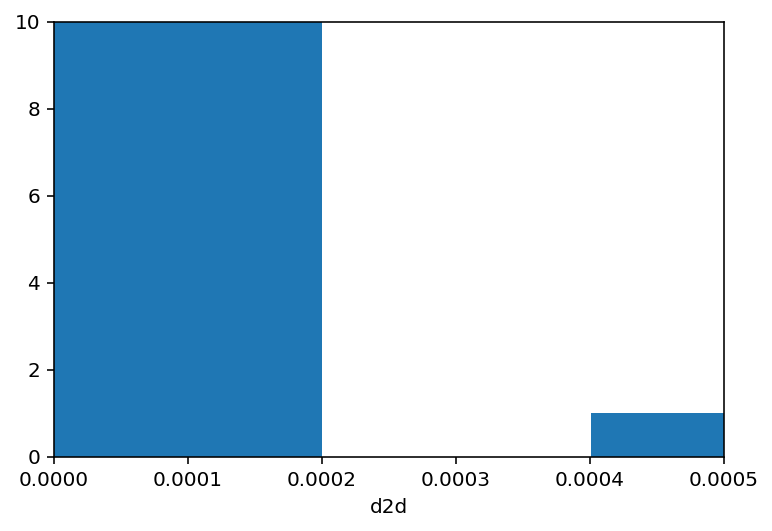

In [6]:
plt.hist(d2dr, bins=30000)
plt.xlabel('d2d')
plt.xlim(0,0.0005)
plt.ylim(0,10)

In [7]:
print len(np.unique(idwx))
print len(np.unique(idrx))
print len(idrx[d2dr<0.0003*u.deg])
print len(idwx[d2dw<0.0003*u.deg])

24430
22256
5276
7812


In [8]:
print 'Objects around to catalog 3d'
idxc_w, idxc_r, d2d, d3d = c_r.search_around_3d(c_w, 1000*u.kpc)

Objects around to catalog 3d


(0, 10)

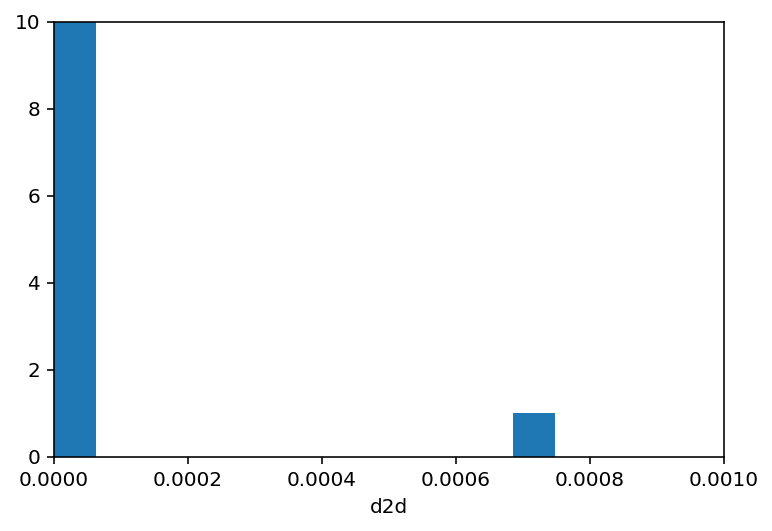

In [9]:
plt.hist(d2d, bins=1000)
plt.xlabel('d2d')
plt.xlim(0,0.001)
plt.ylim(0,10)

In [10]:
print len(np.unique(idxc_w))
print len(np.unique(idxc_r))
print len(idxc_w[d2d<0.0006*u.deg])
print len(idxc_r[d2d<0.0006*u.deg])

obje_w = idxc_w[d2d<0.0006*u.deg]
obje_r = idxc_r[d2d<0.0006*u.deg]

o_we = w[obje_w]
o_re = r[obje_r]

print len(o_we)
print len(o_re)

290
290
250
250
250
250


# Match do Wen com o Koester

In [11]:
print 'match to catalog 3d'
idwkx, d2dwk, d3d = c_w.match_to_catalog_3d(c_k) 
print 'Match Wen em relacao ao Redmapper =',len(idwkx)
print idwkx, d2dwk, d3d 

print 'match to catalog 3d'
idkwx, d2dkw, d3d = c_k.match_to_catalog_3d(c_w) 
print 'Match Wen em relacao ao Redmapper =',len(idkwx)
print idkwx, d2dkw, d3d

match to catalog 3d
Match Wen em relacao ao Redmapper = 132684
[7419 6667 7558 ..., 2448 7558 5206] [u'16d07m07.1878s' u'5d30m45.3252s' u'15d08m42.2407s' ..., u'1d51m03.441s'
 u'5d46m29.1791s' u'2d57m08.201s'] [ 148.67041547   90.07930269  968.68411243 ...,  120.69025126  518.87412629
  120.33543007] Mpc
match to catalog 3d
Match Wen em relacao ao Redmapper = 13823
[102825  40716  77649 ...,  29457  47116  73330] [u'2d06m09.0806s' u'0d00m00.1177s' u'0d22m16.9488s' ..., u'0d31m22.3697s'
 u'0d53m30.4223s' u'3d12m13.1059s'] [ 16.18249004   2.99766175   7.58859743 ...,  10.68611578  16.09161372
  31.08858291] Mpc


(0, 10)

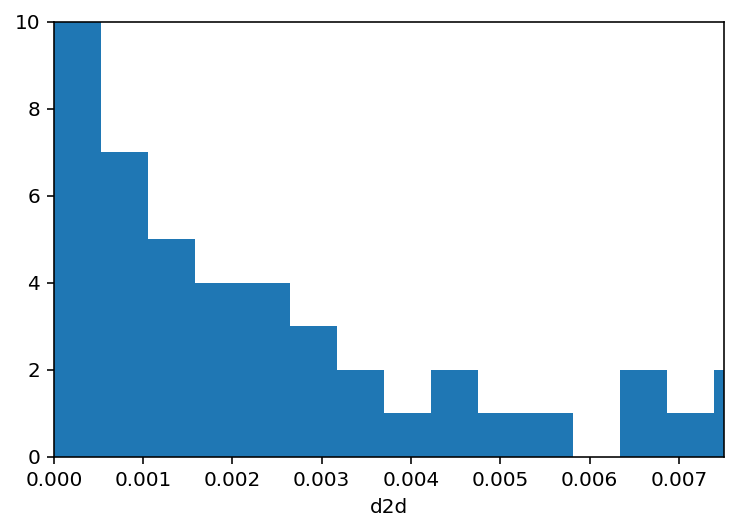

In [14]:
plt.hist(d2dkw, bins=10000)
plt.xlabel('d2d')
plt.xlim(0,0.0075)
plt.ylim(0,10)